In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")

In [86]:
df = pd.read_csv('./Pulsar.csv')
df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [87]:
# Observando los tipos de variables
df.dtypes

Mean_Integrated         float64
SD                      float64
EK                      float64
Skewness                float64
Mean_DMSNR_Curve        float64
SD_DMSNR_Curve          float64
EK_DMSNR_Curve          float64
Skewness_DMSNR_Curve    float64
Class                     int64
dtype: object

In [88]:
# Describiendo las estadísticas básicas
df.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [89]:
# No existen valores nulos
df.isnull().sum()

Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64

Gráfico de diagnóstico

In [90]:
def diagnostic_plot(df, variable):
    plt.figure(figsize = (16,3))
    
    # Histograma
    plt.subplot(1,3,1)
    sns.distplot(df[variable], bins = 30)
    plt.title('Histograma')
    
    # Grafica Q-Q
    plt.subplot(1,3,2)
    stats.probplot(df[variable], dist = 'norm', plot = plt)
    
    # Grafica de Caja
    plt.subplot(1,3,3)
    sns.boxplot(y=df[variable])
    plt.title('Gráfico de Cajas')

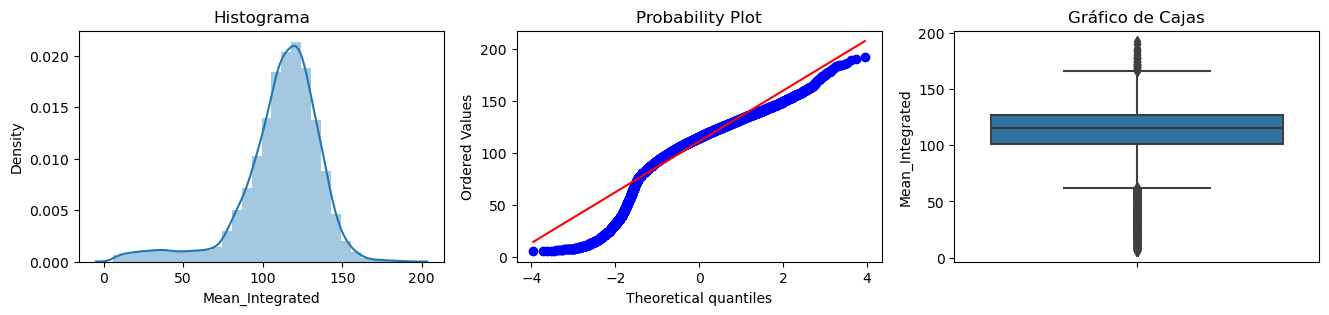

In [91]:
diagnostic_plot(df, 'Mean_Integrated')

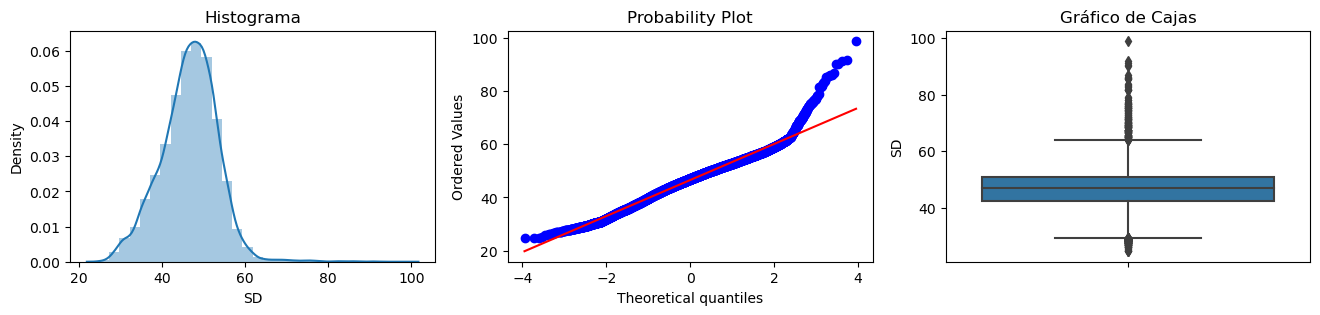

In [92]:
diagnostic_plot(df, 'SD')

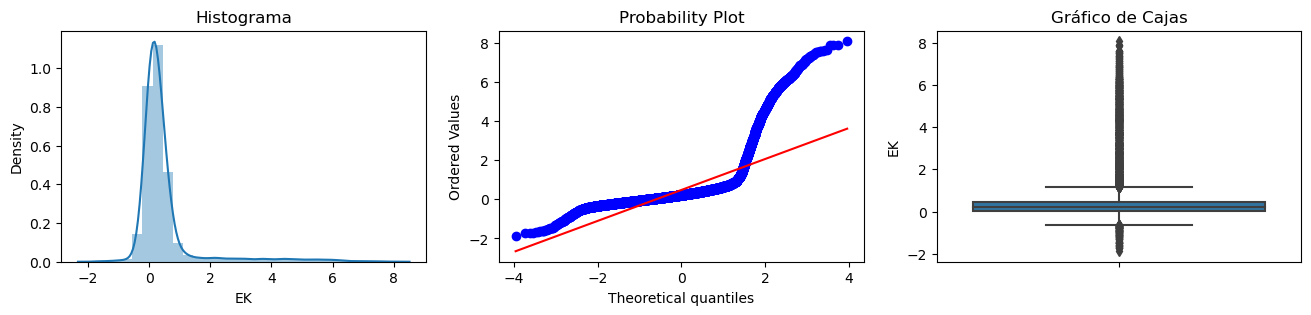

In [93]:
diagnostic_plot(df, 'EK')

Función distancia entre cuartiles

In [94]:
def dist_inter_cuartil(df, variable, distancia):
    
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    limite_inf = df[variable].quantile(0.50) - (IQR * distancia)
    limite_sup = df[variable].quantile(0.75) + (IQR * distancia)
    return limite_sup, limite_inf

Encontramos los límites para la variable "vedadc_n" (edad de los clientes)

In [95]:
# Encontremos los límites superior e inferior para la variable 'SD' 

age_limite_sup, age_limite_inf = dist_inter_cuartil( df ,'SD' , 1.5)
age_limite_sup, age_limite_inf

(63.993978603749994, 33.97670249875)

Reemplazamos los valores extremos

In [96]:
# Reemplazando los valores extremos de la variabe 'SD' por 
# los límites máximos y mínimos

df['SD'] = np.where(df['SD'] > age_limite_sup, age_limite_sup,
                 np.where(df['SD'] < age_limite_inf, age_limite_inf, df['SD']))

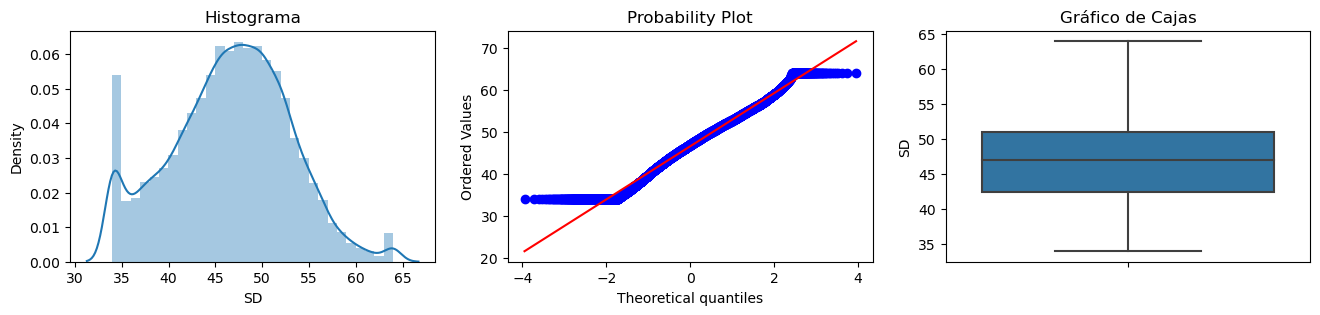

In [97]:
# Observando las gráficas sin outliers de la variable edad 
diagnostic_plot(df, 'SD')

In [98]:
df["SD"]

0        55.683782
1        58.882430
2        39.341649
3        57.178449
4        40.672225
           ...    
17893    59.847421
17894    49.485605
17895    59.935939
17896    53.902400
17897    63.993979
Name: SD, Length: 17898, dtype: float64

Matriz de Correlación

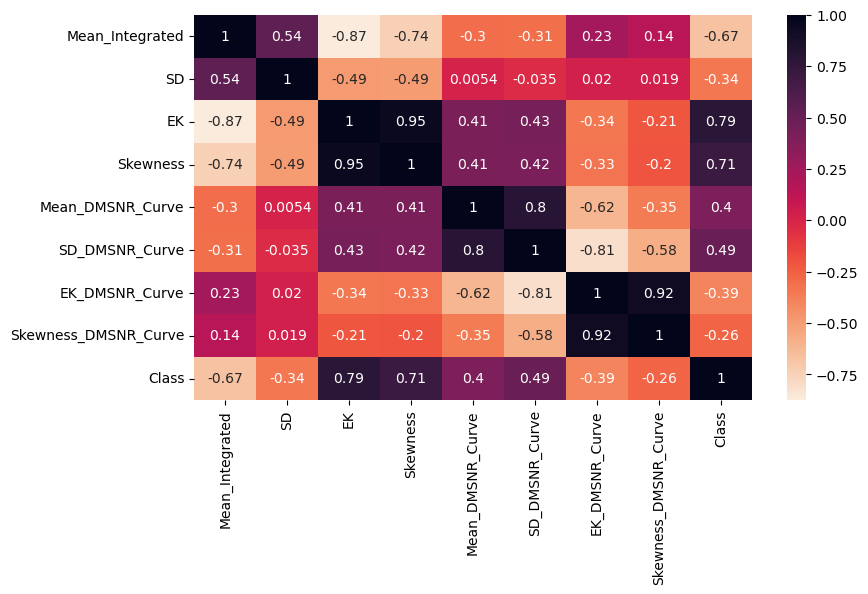

In [99]:
plt.rcParams['figure.figsize']= 9,5  
plt.rcParams['font.size'] = 10

df_small = df.iloc[:,:12]
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap=sns.color_palette("rocket_r",as_cmap=True)) 
plt.show()

In [100]:
# Eliminando las variables "EK", "Mean_DMSNR_Curve" por colinealidad
del df['EK']
del df['Mean_DMSNR_Curve']
del df['Skewness']
del df['EK_DMSNR_Curve']

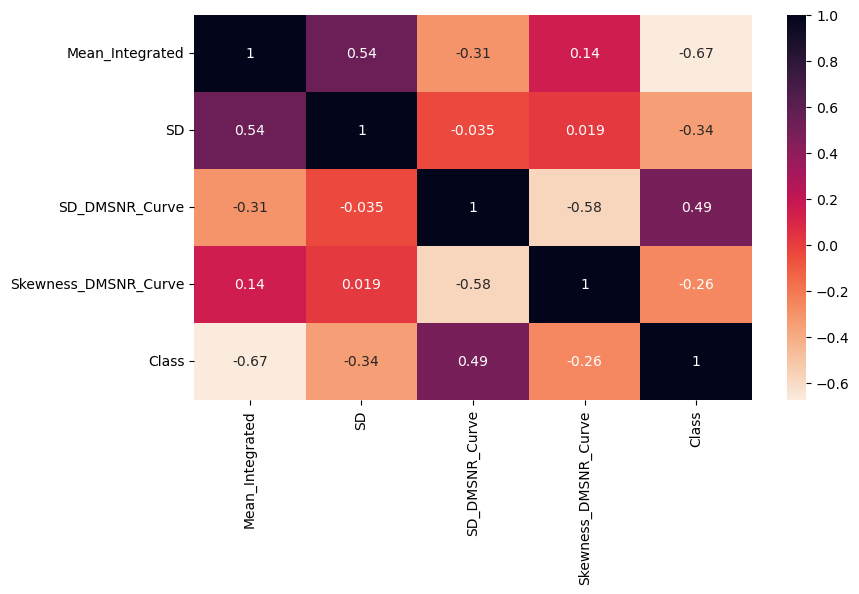

In [102]:
# Ya no existen variables con fuerte colinealidad
plt.rcParams['figure.figsize']= 9,5
plt.rcParams['font.size'] = 10

df_small = df.iloc[:,:12]
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap=sns.color_palette("rocket_r",as_cmap=True)) 
plt.show()

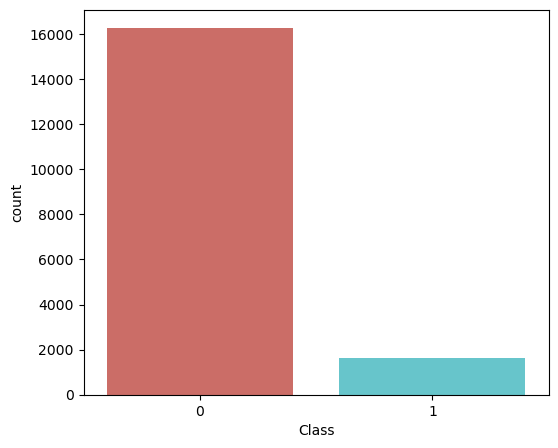

In [103]:
# Observando los datos sin balancear
plt.figure(figsize=(6,5))
sns.countplot(x='Class', data = df, palette = 'hls')
plt.show()

In [104]:
# Separando la variables predictoras y la variable predictiva 
X = df.drop(['Class'], axis=1)
y = df['Class']
X.head()

,Mean_Integrated,SD,SD_DMSNR_Curve,Skewness_DMSNR_Curve
0,140.562500,55.683782,19.110426,74.242225
1,102.507812,58.882430,14.860146,127.393580
2,103.015625,39.341649,21.744669,63.171909
3,136.750000,57.178449,20.959280,53.593661
4,88.726562,40.672225,11.468720,252.567306


In [105]:
# Partición de Datos: Train, Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                                    test_size = 0.3, random_state = 100)

In [106]:
# Cantidad de datos de entrenamiento 
X_train.shape, y_train.shape

((12528, 4), (12528,))

Cross Validation

In [107]:
from sklearn.model_selection import GridSearchCV
# Definiendo parámetros a probar
parameters = {'max_depth': list(range(2, 15)), 
              'min_samples_split': list(range(2, 10)),   
              'max_features': list(range(3, 8)),
              'min_samples_leaf': list(range(1, 10))}  

In [108]:
# Definiendo el modelo
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state = 100)

In [109]:
# Ejecutando Grid Search
import time
inicio = time.time()

GridSearch = GridSearchCV(dtree, parameters,
                          cv = 5,
                          n_jobs = 5,
                          scoring  = 'accuracy',
                          refit = True ,
                          return_train_score = True)

GridSearch.fit(X_train, y_train.ravel())

fin = time.time()
print('El tiempo de ejecución es: ', (fin-inicio)/60, 'minutos') 

El tiempo de ejecución es:  3.359374992052714 minutos


In [110]:
# Mejores parámetros:
print('Los mejores parámetros son :', GridSearch.best_params_)
print('Con el mejor accuracy : ', GridSearch.best_score_)

Los mejores parámetros son : {'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 9}
Con el mejor accuracy :  0.9738188427614046


In [111]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, 
                            max_depth = 4,
                            criterion = 'gini', 
                            min_samples_leaf = 1,   # número mínimo de muestras requeridas para un nodo hoja válido
                            min_samples_split = 9,  # número mínimo de muestras requeridas para dividir un nodo no hoja
                            max_features = 3,
                            bootstrap = True,       # muestreo aleatorio
                            oob_score = True,
                            n_jobs = 5,
                            random_state = 100)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features=3, min_samples_split=9,
                       n_jobs=5, oob_score=True, random_state=100)

In [112]:
# Entrenando el algoritmo para validar
y_predict_train = rf.predict(X_train)   # Predicción sobre el train
y_predict_test  = rf.predict(X_test)    # Predicción sobre el test 

In [113]:
from sklearn.metrics import accuracy_score
# Calculando el Accurary 
print('Accuracy Train :', accuracy_score(y_train, y_predict_train))
print('Accuracy Test  :', accuracy_score(y_test, y_predict_test))

Accuracy Train : 0.9758141762452107
Accuracy Test  : 0.9707635009310986


In [114]:
# Calculando la precisión 
from sklearn.metrics import precision_score
print('Precisión train :', precision_score(y_train, y_predict_train))
print('Precisión test  :', precision_score(y_test, y_predict_test))

Precisión train : 0.9405010438413361
Precisión test  : 0.8959810874704491


In [115]:
# Calculando el recall
from sklearn.metrics import recall_score
print('Recall train :', recall_score(y_train, y_predict_train))
print('Recall test  :', recall_score(y_test, y_predict_test))

Recall train : 0.7855274629468177
Recall test  : 0.7703252032520326


In [116]:
from sklearn.metrics import confusion_matrix
# Matriz de confusión train 
m_confusion_train = confusion_matrix(y_train, y_predict_train)

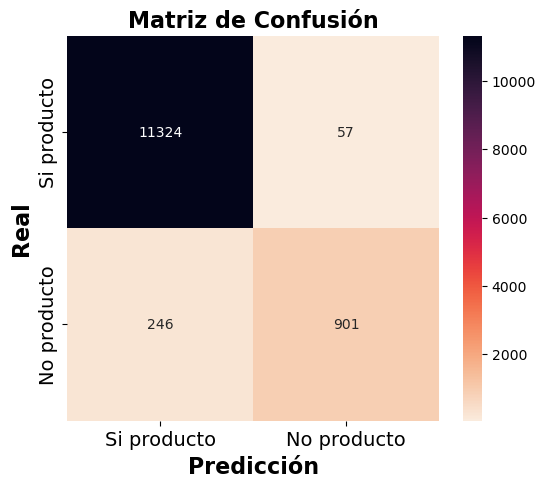

In [117]:
plt.figure(figsize=(6,5)) 
ax= plt.subplot()
sns.heatmap(m_confusion_train, annot=True, ax = ax, cmap=sns.color_palette("rocket_r", as_cmap=True), fmt='g')
ax.set_xlabel('Predicción', fontweight='bold', fontsize=16)
ax.set_ylabel('Real', fontsize=16, fontweight='bold')
ax.set_title('Matriz de Confusión', fontsize=16, fontweight='bold')
ax.xaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)
ax.yaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)
plt.show()

In [118]:
# Matriz de confusión test 
m_confusion_test = confusion_matrix(y_test, y_predict_test)

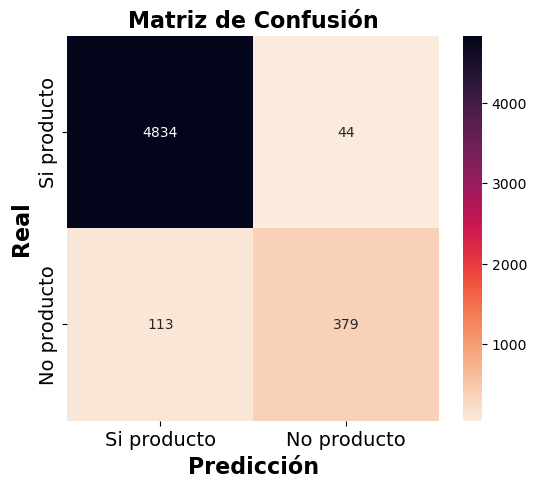

In [119]:
plt.figure(figsize=(6,5)) 
ax= plt.subplot()
sns.heatmap(m_confusion_test, annot=True, ax = ax, cmap=sns.color_palette("rocket_r", as_cmap=True), fmt='g')
ax.set_xlabel('Predicción', fontweight='bold', fontsize=16)
ax.set_ylabel('Real', fontsize=16, fontweight='bold')
ax.set_title('Matriz de Confusión', fontsize=16, fontweight='bold')
ax.xaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)
ax.yaxis.set_ticklabels(['Si producto', 'No producto'], fontsize=14)
plt.show()

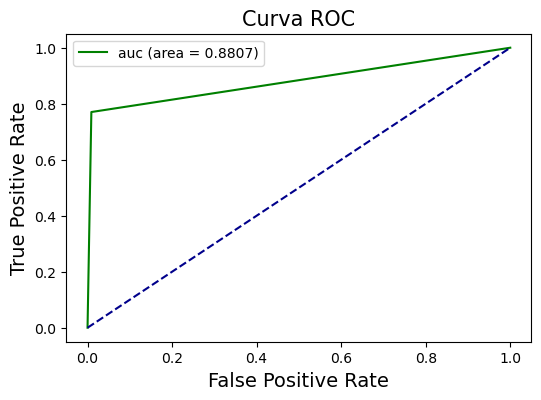

In [120]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_predict_test)
fpr, tpr, threshold = roc_curve(y_test, y_predict_test)
plt.figure(figsize = (6,4))
plt.plot(fpr, tpr, color = 'green', label = 'auc (area = %0.4f)' % auc) 
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.title('Curva ROC', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.legend()
plt.show()

In [121]:
# Hacer un archivo pickle de nuestro modelo
import pickle
pickle.dump(rf, open("model.pkl", "wb"))